<center> Choose Bucket using current flow betweenness centrality </center>
---

In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [9]:
%%capture

# list of our algorithms
our_algs = ['seedexCFBC', 'seedexCFBC-jac', 'seedexCFBC-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

'''
for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
'''
    
for alg in our_algs:
    alg_dfs = []

    for bs in bucket_size:
        cs.MAX_SEED_SIZE = bs
        data = []

        for kr in keep_ratio:
            cs.SEED_KEEP_RATIO = kr
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

        alg_dfs.append(df)

    cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
    alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexCFBC     bucket size: 800  keep ratio: 0.1  10152  0.739996   801   
                                 keep ratio: 0.2  10320  0.752241   797   
                                 keep ratio: 0.3  10417  0.759312   789   
                                 keep ratio: 0.4  10411  0.758875   793   
                                 keep ratio: 0.5  10372  0.756032   795   
                                 keep ratio: 0.6   9261  0.675049   759   
                                 keep ratio: 0.7   7982  0.581821   712   
               bucket size: 1000 keep ratio: 0.1  10221  0.745025   773   
                                 keep ratio: 0.2  10382  0.756761   787   
                                 keep ratio: 0.3  10441  0.761061   859   
                                 keep ratio: 0.4  10463  0.762665   803   
                                 keep ratio: 0.5  10415  0.759166   788   
                                 keep ratio: 0.6   9979  0.727385   765   
                                 keep ratio: 0.7   9203  0.670821   721   
               bucket size: 1200 keep ratio: 0.1  10257  0.747649   783   
                                 keep ratio: 0.2  10317  0.752023   793   
                                 keep ratio: 0.3  10465  0.762811   790   
                                 keep ratio: 0.4  10407  0.758583   771   
                                 keep ratio: 0.5  10370  0.755886   791   
                                 keep ratio: 0.6   9969  0.726656   758   
                                 keep ratio: 0.7   9146  0.666667   709   
               bucket size: 1400 keep ratio: 0.1  10281  0.749399   796   
                                 keep ratio: 0.2  10295  0.750419   784   
                                 keep ratio: 0.3  10458  0.762300   786   
                                 keep ratio: 0.4  10400  0.758073   790   
                                 keep ratio: 0.5  10351  0.754501   785   
                                 keep ratio: 0.6   9969  0.726656   762   
                                 keep ratio: 0.7   9310  0.678621   709   
seedexCFBC-jac bucket size: 800  keep ratio: 0.1   8726  0.636052   857   
                                 keep ratio: 0.2   9500  0.692470   836   
                                 keep ratio: 0.3   9795  0.713973   793   
                                 keep ratio: 0.4   9699  0.706976   803   
                                 keep ratio: 0.5   9765  0.711787   805   
                                 keep ratio: 0.6   8684  0.632991   767   
                                 keep ratio: 0.7   7588  0.553102   704   
               bucket size: 1000 keep ratio: 0.1   9007  0.656535   823   
                                 keep ratio: 0.2   9765  0.711787   817   
                                 keep ratio: 0.3  10069  0.733946   821   
                                 keep ratio: 0.4  10126  0.738100   817   
                                 keep ratio: 0.5  10082  0.734893   816   
                                 keep ratio: 0.6   9683  0.705809   794   
                                 keep ratio: 0.7   8984  0.654858   742   
               bucket size: 1200 keep ratio: 0.1   8836  0.644070   836   
                                 keep ratio: 0.2   9576  0.698010   806   
                                 keep ratio: 0.3  10098  0.736059   815   
                                 keep ratio: 0.4  10075  0.734383   815   
                                 keep ratio: 0.5  10100  0.736205   817   
                                 keep ratio: 0.6   9804  0.714629   792   
                                 keep ratio: 0.7   9006  0.656462   722   
               bucket size: 1400 keep ratio: 0.1   9080  0.661856   806   
                                 keep ratio: 0.2   9840  0.717253   812   
                                 keep ratio: 0.3  10034  0.731394   807   
                                 keep ratio: 0.4  10061  0.733362   819   
   



### bucket size & seed size
---

In [11]:
%%capture

# list of our algorithms
our_algs = ['seedexCFBC', 'seedexCFBC-jac', 'seedexCFBC-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexCFBC     bucket size: 800  seed size: 100  10199  0.743422   831   
                                 seed size: 200  10355  0.754793   865   
                                 seed size: 300  10421  0.759603   807   
                                 seed size: 400  10372  0.756032   795   
                                 seed size: 500   8815  0.642540   749   
                                 seed size: 600   7511  0.547489   679   
                                 seed size: 700   5324  0.388075   569   
                                 seed size: 800   5017  0.365697   533   
               bucket size: 1000 seed size: 100  10221  0.745025   773   
                                 seed size: 200  10382  0.756761   787   
                                 seed size: 300  10441  0.761061   859   
                                 seed size: 400  10463  0.762665   803   
                                 seed size: 500  10415  0.759166   788   
                                 seed size: 600   9979  0.727385   765   
                                 seed size: 700   9203  0.670821   721   
                                 seed size: 800   7270  0.529922   658   
               bucket size: 1200 seed size: 100  10122  0.737809   770   
                                 seed size: 200  10254  0.747431   773   
                                 seed size: 300  10426  0.759968   814   
                                 seed size: 400  10469  0.763102   784   
                                 seed size: 500  10433  0.760478   773   
                                 seed size: 600  10370  0.755886   791   
                                 seed size: 700  10169  0.741235   768   
                                 seed size: 800   9497  0.692252   720   
               bucket size: 1400 seed size: 100  10103  0.736424   756   
                                 seed size: 200  10269  0.748524   780   
                                 seed size: 300  10397  0.757854   836   
                                 seed size: 400  10385  0.756979   809   
                                 seed size: 500  10442  0.761134   780   
                                 seed size: 600  10407  0.758583   782   
                                 seed size: 700  10351  0.754501   785   
                                 seed size: 800  10059  0.733217   772   
seedexCFBC-jac bucket size: 800  seed size: 100   9359  0.682193   553   
                                 seed size: 200   9818  0.715650   838   
                                 seed size: 300   9829  0.716452   790   
                                 seed size: 400   9765  0.711787   805   
                                 seed size: 500   8421  0.613820   735   
                                 seed size: 600   7065  0.514979   665   
                                 seed size: 700   5236  0.381660   579   
                                 seed size: 800   4843  0.353014   519   
               bucket size: 1000 seed size: 100   9007  0.656535   823   
                                 seed size: 200   9765  0.711787   817   
                                 seed size: 300  10069  0.733946   821   
                                 seed size: 400  10126  0.738100   817   
                                 seed size: 500  10082  0.734893   816   
                                 seed size: 600   9683  0.705809   794   
                                 seed size: 700   8984  0.654858   742   
                                 seed size: 800   7207  0.525330   676   
               bucket size: 1200 seed size: 100   8959  0.653036   859   
                                 seed size: 200   9781  0.712953   871   
                                 seed size: 300   9797  0.714119   846   
                                 seed size: 400  10092  0.735622   809   
                                 seed size: 500  10120  0.737663   816   
                                 seed size: 600  10100  

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


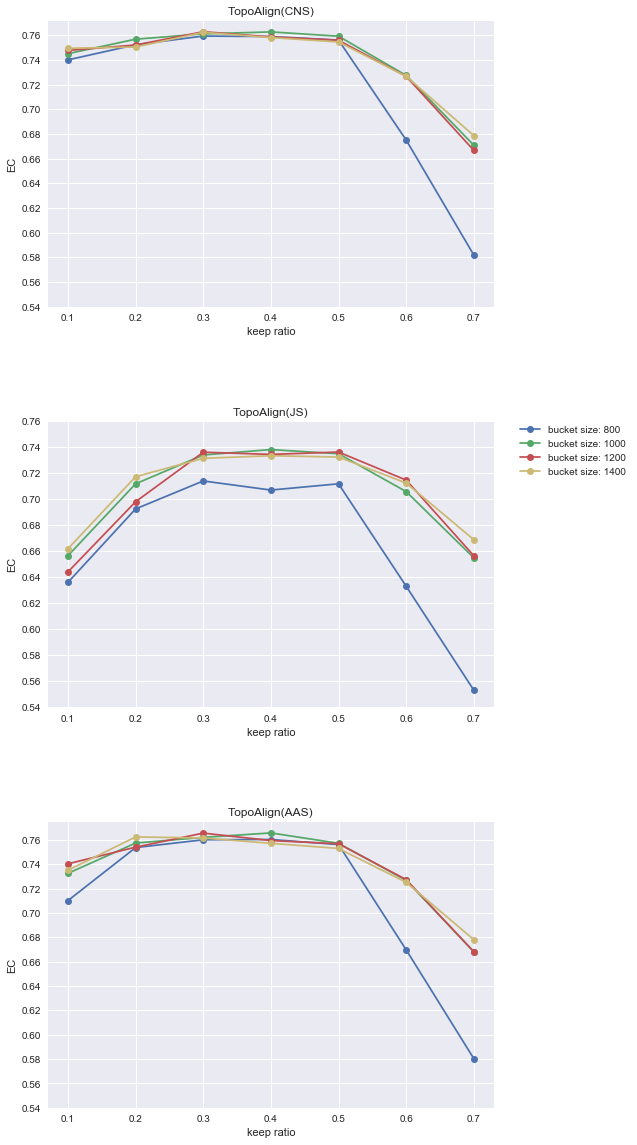

In [16]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
colors = ['b', 'g', 'r', 'y']

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.54, 0.78, 0.02))
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("results/bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


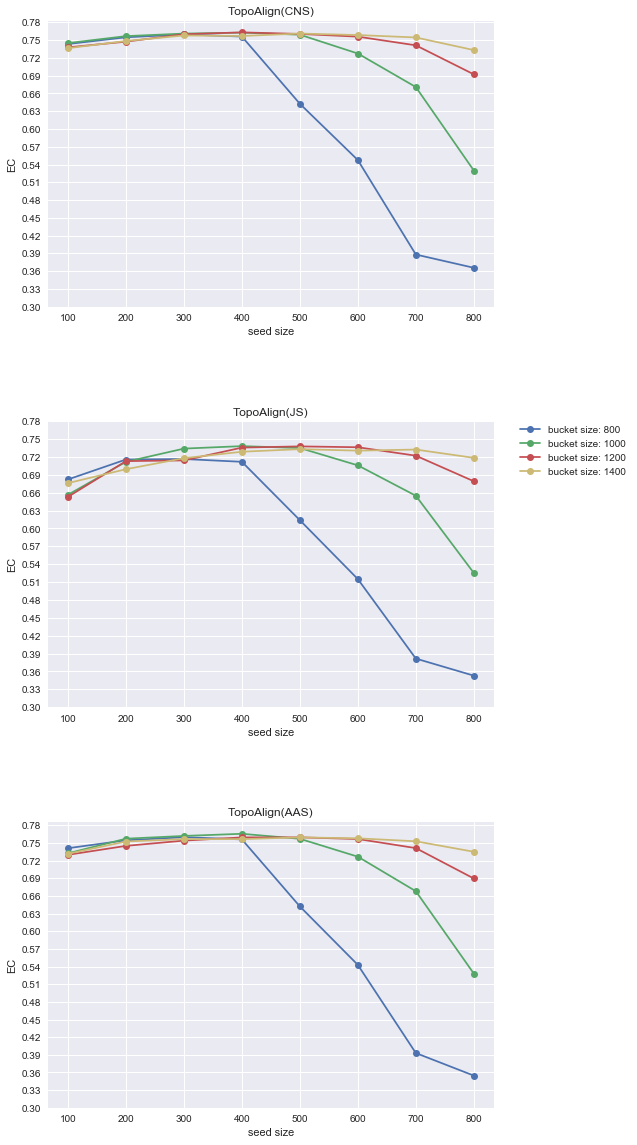

In [17]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

colors = ['b', 'g', 'r', 'y']

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.3, 0.78, 0.03))
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig("results/seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Currenct Flow Betweenness Centrality - Node Degree Plot
---

In [4]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

connected_graphs1 = list(nx.connected_component_subgraphs(G1))
connected_graphs2 = list(nx.connected_component_subgraphs(G2))

comp1 = sorted(connected_graphs1, key=len, reverse=True)[0]
comp2 = sorted(connected_graphs2, key=len, reverse=True)[0]

CFBC1 = nx.current_flow_betweenness_centrality(comp1).items()
CFBC2 = nx.current_flow_betweenness_centrality(comp2).items()

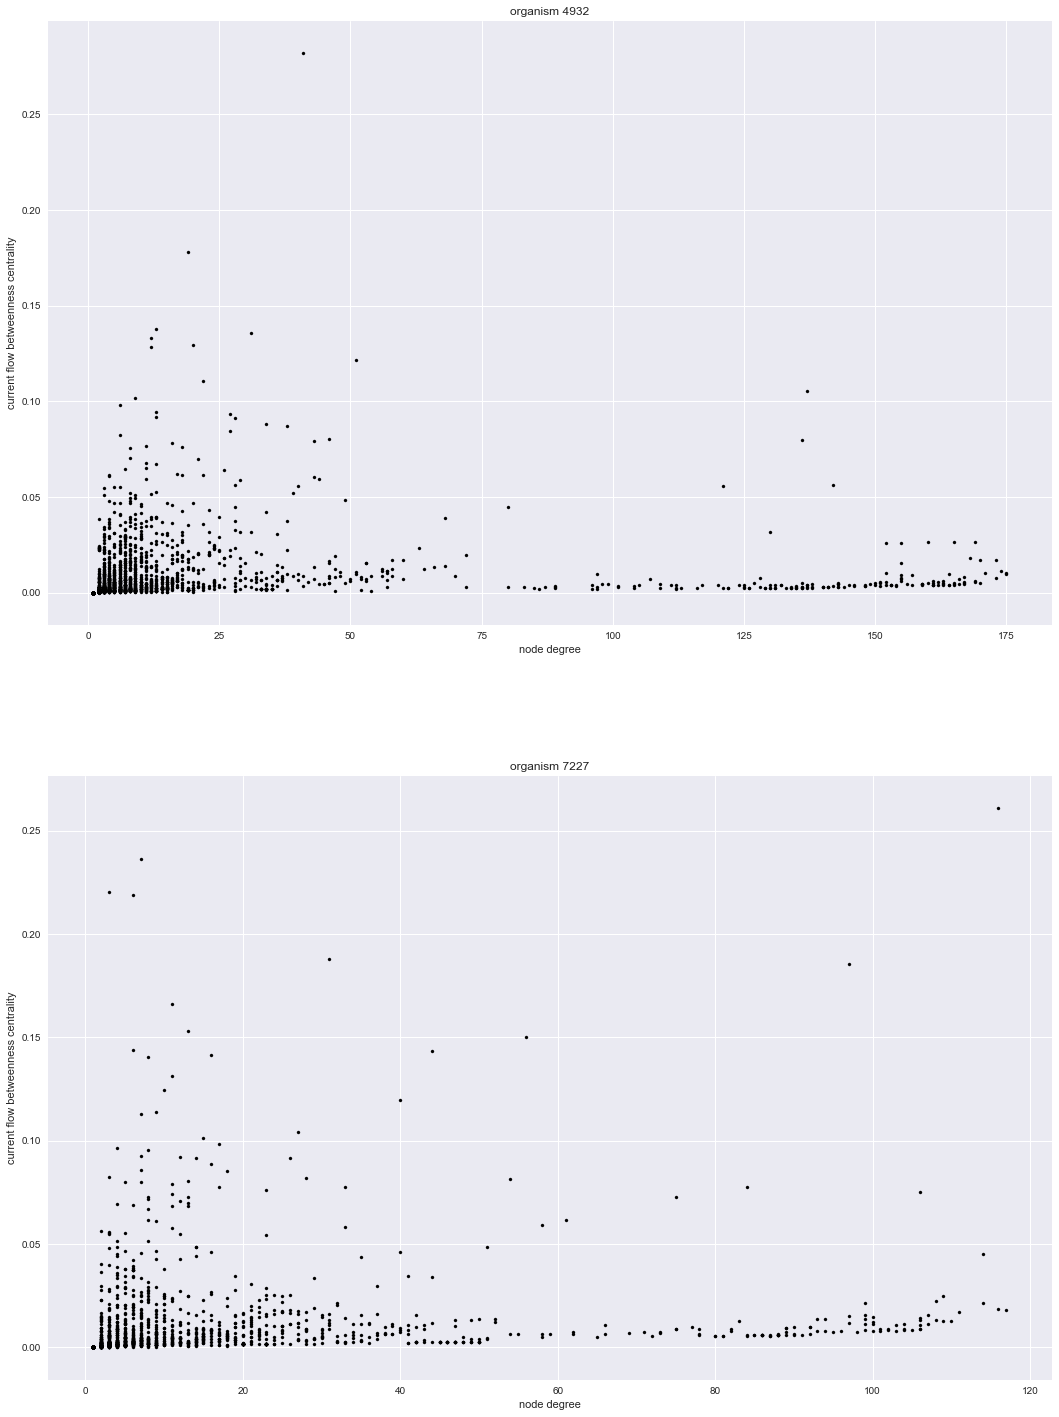

In [8]:
DEG1, VAL1 = [], []
for node, value in CFBC1:
    DEG1.append(bio_net.org1.degree[node])
    VAL1.append(value)

DEG2, VAL2 = [], []
for node, value in CFBC2:
    DEG2.append(bio_net.org2.degree[node])
    VAL2.append(value)

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('current flow betweenness centrality')
plt.xlabel('node degree')


plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('current flow betweenness centrality')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("cfbc-degree.pdf", bbox_inches='tight')
plt.show()